<a href="https://colab.research.google.com/github/DKojen/Matrix/blob/master/day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
feats = ['brand_cat']
x = df[feats].values
y = df['prices_amountmin']

model = DecisionTreeRegressor(max_depth=5)

scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)


(-58.38655694633361, 4.223555478221712)

In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [26]:
cd '/content/drive/My Drive/Colab Notebooks/Matrix'

/content/drive/My Drive/Colab Notebooks/Matrix


In [27]:
df = pd.read_csv('data/men_shoes.csv', low_memory=False)
df.shape

(18280, 49)

In [28]:
df.columns

Index(['Unnamed: 0', 'id', 'asins', 'brand', 'categories', 'colors', 'count',
       'dateadded', 'dateupdated', 'descriptions', 'dimension', 'ean',
       'features', 'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [29]:
mean_price = np.mean(df['prices_amountmin'])
mean_price

93.53952188183217

In [30]:
y_true = df['prices_amountmin']
y_pred = [np.median(y_true)] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.01120240700219

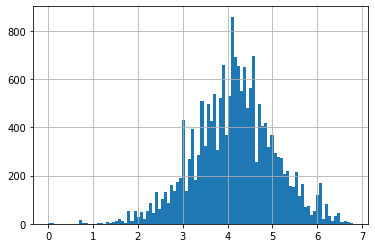

In [33]:
np.log1p(df['prices_amountmin']).hist(bins=100)

In [38]:
y_true = df['prices_amountmin']
price_log_mean = np.expm1( np.mean( np.log1p(y_true ))) 
y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.03539547661041

In [36]:
np.exp( np.mean( np.log1p(y_true ))) - 1

62.92811169273113

In [39]:
df.brand.value_counts()

Nike                           1709
PUMA                            574
Ralph Lauren                    524
New Balance                     361
VANS                            356
                               ... 
Boston Harbour                    1
Shrine Boxers                     1
Adidas Crazy1 Kobe BB shoes       1
Co7de                             1
DanceNwear                        1
Name: brand, Length: 1856, dtype: int64

In [0]:
df['brand_cat'] = df['brand'].factorize()[0]

In [45]:
feats = ['brand_cat']
x = df[feats].values
y = df['prices_amountmin']

model = DecisionTreeRegressor(max_depth=5)

scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)


(-58.38655694633361, 4.223555478221712)

In [0]:
def run_model(feats):
  x = df[feats].values
  y = df['prices_amountmin']

  model = DecisionTreeRegressor(max_depth=5)

  scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)


In [48]:
run_model(['brand_cat'])

(-58.38655694633361, 4.223555478221712)

In [0]:
df['flavors_cat'] = df['flavors'].factorize()[0]

In [0]:
def run_model(feats):
  x = df[feats].values
  y = df['prices_amountmin']

  model = DecisionTreeRegressor(max_depth=5)

  scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [51]:
run_model(['flavors_cat'])

(-64.00110841258031, 3.605273194168391)

In [52]:
run_model(['brand_cat', 'flavors_cat'])

(-58.38655694633361, 4.223555478221712)